In [1]:
# Importing Libraries
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

In [2]:
# Datasets
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

#steamCombinedReviews

C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (3,4,7,12,13,14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\justi\anaconda3\lib\site-packages\IP

In [107]:
steamCombinedReviews

,Unnamed: 0,title,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,...,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,timestamp_dev_responded,developer_response
0,0.0,7 Days to Die,77156977.0,english,turd,1.602039e+09,1.602039e+09,True,0.0,0.0,...,True,7.656120e+16,12.0,3.0,651.0,91.0,586.0,1.602042e+09,NaN,NaN
1,1.0,7 Days to Die,77156585.0,english,this is a great game and I hope more people wi...,1.602038e+09,1.602038e+09,True,0.0,0.0,...,True,7.656120e+16,28.0,5.0,5269.0,1359.0,5269.0,1.601590e+09,NaN,NaN
2,2.0,7 Days to Die,77156574.0,english,Good game,1.602038e+09,1.602038e+09,True,0.0,0.0,...,True,7.656120e+16,388.0,14.0,7993.0,509.0,7993.0,1.601969e+09,NaN,NaN
3,3.0,7 Days to Die,77155220.0,english,Haha bat hit zombie and zombie head explode,1.602035e+09,1.602035e+09,True,0.0,0.0,...,True,7.656120e+16,66.0,3.0,6884.0,1081.0,6794.0,1.602046e+09,NaN,NaN
4,4.0,7 Days to Die,77153527.0,english,ZOMBIE GO GRRR GUN GO BRRRRRR,1.602032e+09,1.602032e+09,True,0.0,0.0,...,True,7.656120e+16,62.0,2.0,6504.0,59.0,6504.0,1.601544e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,86.0,The Elder Scrolls V Skyrim,3813120,english,Epic!,1.320805e+09,1.320805e+09,True,0.0,0.0,...,False,7.660000e+16,299.0,10.0,64708.0,0.0,21594.0,1.591784e+09,NaN,NaN
387,87.0,The Elder Scrolls V Skyrim,377008,english,This game...,1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,935.0,1.0,13158.0,0.0,9443.0,1.487270e+09,NaN,NaN
388,88.0,The Elder Scrolls V Skyrim,1227072,english,"Waifu Simulator 2011, OH THANK YOU BETHESDA.",1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,556.0,45.0,5353.0,0.0,4736.0,1.374190e+09,NaN,NaN
389,89.0,The Elder Scrolls V Skyrim,606065,english,"GET IT YOU GNOMERS! :P Fourms be damned, Skyri...",1.320803e+09,1.320803e+09,True,0.0,0.0,...,False,7.660000e+16,207.0,5.0,77159.0,0.0,31836.0,1.464555e+09,NaN,NaN


In [108]:
steamGames

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, W

In [109]:
steamData

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [110]:
# Renaming columns 
steamGames = steamGames.rename(columns={"name": "title"})
steamData = steamData.rename(columns={"name":"title"})

In [111]:
# Renaming titles for matching
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
#steamCombinedReviews['clean_review'] = hero.clean(steamCombinedReviews['review'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)
steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)

In [112]:
# Creating dataframe for title and developer for steamGames
gamesdev = steamGames[['title','developer']]
gamesdev

,title,developer
0,doom,id Software
1,playerunknown s battlegrounds,PUBG Corporation
2,battletech,Harebrained Schemes
3,dayz,Bohemia Interactive
4,eve online,CCP
...,...,...
828,rocksmith(r) 2014 edition - remastered - sabat...,Ubisoft - San Francisco
829,rocksmith(r) 2014 edition - remastered - stone...,Ubisoft - San Francisco
830,fantasy grounds quests of doom 4 a midnight co...,"SmiteWorks USA, LLC"
831,mega man x5 sound collection,"CAPCOM CO., LTD"


In [113]:
# Creating dataframe for title and developer for steamData
datadevs = steamData[['title','developer','positive_ratings']]
datadevs

,title,developer,positive_ratings
0,counter strike,Valve,124534
1,team fortress classic,Valve,3318
2,day of defeat,Valve,3416
3,deathmatch classic,Valve,1273
4,half life opposing force,Gearbox Software,5250
...,...,...,...
27070,room of pandora,SHEN JIAWEI,3
27071,cyber gun,Semyon Maximov,8
27072,super star blast,EntwicklerX,0
27073,new yankee 7 deer hunters,Yustas Game Studio,2


In [114]:
# Combining dataframes
devs = pd.concat([datadevs, gamesdev])
devs = devs.drop_duplicates(['title'])
devs = devs.reset_index(drop=True)
nan_value = float("NaN")
devs.replace("", nan_value, inplace=True)
devs.dropna(subset = ["title"], inplace=True)
devs

,title,developer,positive_ratings
0,counter strike,Valve,124534.0
1,team fortress classic,Valve,3318.0
2,day of defeat,Valve,3416.0
3,deathmatch classic,Valve,1273.0
4,half life opposing force,Gearbox Software,5250.0
...,...,...,...
48118,rocksmith(r) 2014 edition - remastered - sabat...,Ubisoft - San Francisco,NaN
48119,rocksmith(r) 2014 edition - remastered - sabat...,Ubisoft - San Francisco,NaN
48120,rocksmith(r) 2014 edition - remastered - stone...,Ubisoft - San Francisco,NaN
48121,fantasy grounds quests of doom 4 a midnight co...,"SmiteWorks USA, LLC",NaN


In [123]:
# Filtering out games that are in both dev dataframe and steamCombinedReviews
match_title = devs.title.isin(steamCombinedReviews.title)
developers = devs[match_title]
developers

,title,developer,positive_ratings
0,counter strike,Valve,124534.0
10,counter strike source,Valve,76640.0
21,left 4 dead 2,Valve,251789.0
23,portal 2,Valve,138220.0
116,sid meier s civilization(r) iii complete,Firaxis Games,2578.0
...,...,...,...
27158,total war medieval ii definitive edition,The Creative Assembly,NaN
27388,metro exodus,4A Games,NaN
46755,transport fever 2,Urban Games,NaN
47150,halo the master chief collection,"343 Industries,Splash Damage,Ruffian Games",NaN


In [188]:
# Dropping NaN values of ratings
developers.dropna(subset = ["positive_ratings"], inplace=True)
developers

<ipython-input-188-c4734234511f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developers.dropna(subset = ["positive_ratings"], inplace=True)


,title,developer,positive_ratings
0,counter strike,Valve,124534.0
10,counter strike source,Valve,76640.0
21,left 4 dead 2,Valve,251789.0
23,portal 2,Valve,138220.0
116,sid meier s civilization(r) iii complete,Firaxis Games,2578.0
...,...,...,...
21427,atlas,Grapeshot Games;Instinct Games,8621.0
22413,hitman(tm) 2,IO Interactive A/S,10814.0
22723,football manager 2019,Sports Interactive,2963.0
24741,among us,Innersloth,60.0


In [189]:
developers.positive_ratings.describe()

count       124.000000
mean      50919.258065
std       74141.334795
min          60.000000
25%       10784.250000
50%       24243.000000
75%       55622.750000
max      496184.000000
Name: positive_ratings, dtype: float64

<AxesSubplot:>

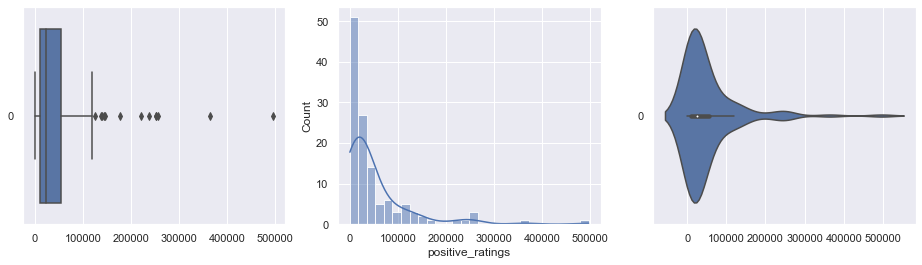

In [190]:
# Visualization of ratings data
f, axes = plt.subplots(1,3,figsize=(16, 4))
sb.boxplot(data = developers.positive_ratings, orient = "h", ax=axes[0])
sb.histplot(data = developers.positive_ratings, kde=True, ax=axes[1])
sb.violinplot(data = developers.positive_ratings, orient = "h", ax = axes[2])

In [187]:
# Getting mean positive ratings of developers
developer_ratings=developers.groupby(["developer"])[["positive_ratings"]].describe()
ratings_raw = pd.DataFrame(developer_ratings)
ratings_raw.columns = ['count', 'mean', '1', '2', '3', '4', '5','6']
ratings = pd.DataFrame(ratings_raw['mean'])
ratings.columns = ['mean']
ratings

,mean
developer,
Afterthought LLC,7107.00
Antimatter Games;Tripwire Interactive,17201.00
Arc System Works,10441.00
Avalanche Studios;Feral Interactive (Mac);Feral Interactive (Linux),36222.00
Axolot Games,15197.00
...,...
Unknown Worlds Entertainment,90155.00
Valve,147795.75
Warhorse Studios,30024.00


In [173]:
# Cleaning Data
ratings.reset_index(level=0, inplace = True)
ratings.sort_values(by=['mean'], inplace=True, ascending=False)
ratings

,index,developer,mean
67,67,PUBG Corporation,496184.00
28,28,Facepunch Studios,292045.50
73,73,Re-Logic,255600.00
100,100,Ubisoft Montreal,251178.00
105,105,Valve,147795.75
...,...,...,...
88,88,Strange Loop Games,1875.00
91,91,Sunfire Software,1478.00
61,61,Ninja Kiwi,516.00
80,80,"Sastrei Studios, LLC",311.00


<AxesSubplot:xlabel='developer', ylabel='mean'>

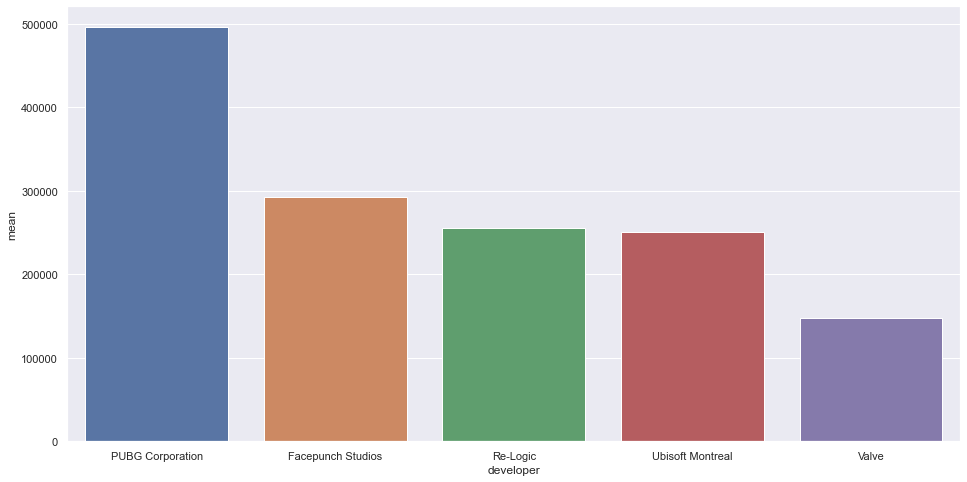

In [186]:
# Plotting graph of developers vs mean_positive_ratings
f, axes = plt.subplots(figsize = [16,8])
sb.barplot(x = 'developer', y = 'mean', data = ratings.head())

# Conclusion

These are the top game developers you would want to work with, and from our results, we conclude that developing your game with PUBG Corporation would garner you the most average positive ratings amongst gamers which will likely offer you the highest chances of success when publishing a game.  